In [80]:
!pip install pca

  Using cached pca-2.0.7-py3-none-any.whl.metadata (10 kB)
  Using cached datazets-0.2.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached colourmap-1.1.17-py3-none-any.whl.metadata (4.1 kB)
  Using cached scatterd-1.3.7-py3-none-any.whl.metadata (5.1 kB)
  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached pca-2.0.7-py3-none-any.whl (36 kB)
Using cached colourmap-1.1.17-py3-none-any.whl (10 kB)
Using cached scatterd-1.3.7-py3-none-any.whl (12 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)
Using cached datazets-0.2.0-py3-none-any.whl (13 kB)


In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
milk = pd.read_csv("milk.csv",index_col=0)

In [11]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, HORSE to DOLPHIN
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    25 non-null     float64
 1   protein  25 non-null     float64
 2   fat      25 non-null     float64
 3   lactose  25 non-null     float64
 4   ash      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [13]:
milk.head()


,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [15]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scl = scaler.fit_transform(milk)

In [17]:
milk_scl

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988
CAMEL,0.757707,-0.757806,-0.670322,0.372182,-0.309730
BISON,0.694008,-0.394551,-0.835283,0.873626,0.074400
BUFFALO,0.311810,-0.087181,-0.233662,0.316466,-0.168208
GUINEA PIG,0.295885,0.331959,-0.301587,-0.797852,-0.026687


In [19]:
prcomp = PCA().set_output(transform='pandas')

In [23]:
scores = prcomp.fit_transform(milk_scl) # PCA values

In [25]:
scores

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,-2.435175,-0.231478,0.330150,0.307664,-0.048184
ORANGUTAN,-2.258736,-0.693148,0.029035,-0.081057,0.000532
MONKEY,-2.335861,-0.663328,0.101257,0.247997,-0.010109
DONKEY,-2.318677,-0.273815,0.109881,-0.092873,0.006769
HIPPO,-2.060294,-1.019199,-0.762436,-0.510091,-0.029382
CAMEL,-1.301536,0.137303,-0.198742,-0.282160,0.014668
BISON,-1.282742,0.622667,0.253785,0.065148,0.044486
BUFFALO,-0.505068,0.088235,0.008383,0.133774,-0.083806
GUINEA PIG,0.255502,0.287373,-0.881857,-0.013100,0.016484


In [43]:
var_cov = np.cov(milk_scl.T)

In [58]:
values, vectors = np.linalg.eig(var_cov)
values #Eigen Values

array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ])

In [60]:
vectors #Eigen vectors

array([[-0.47294379,  0.35285509, -0.70967042,  0.36921298,  0.10893632],
       [ 0.46657047,  0.32094099, -0.1930657 ,  0.15196177, -0.78672876],
       [ 0.44868269, -0.47603724, -0.66831106, -0.30699163,  0.17660367],
       [-0.48289116,  0.05951482, -0.11159049, -0.77642589, -0.38468756],
       [ 0.35232959,  0.73643513,  0.00118661, -0.378825  ,  0.43590982]])

In [53]:
scores.var() #eigen values


pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

** Variances of the PCA scores are nothing  but the eigen values of variance-covariance matrix

In [68]:
prcomp.components_ #transpose of above eigen vectors

array([[-0.47294379,  0.46657047,  0.44868269, -0.48289116,  0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513],
       [-0.36921298, -0.15196177,  0.30699163,  0.77642589,  0.378825  ],
       [-0.10893632,  0.78672876, -0.17660367,  0.38468756, -0.43590982],
       [-0.70967042, -0.1930657 , -0.66831106, -0.11159049,  0.00118661]])

In [70]:
total_var = scores.var().sum()

In [72]:
total_var

5.208333333333337

% variations


In [74]:
(scores.var()/total_var)*100

pca0    77.575905
pca1    17.747950
pca2     2.578385
pca3     1.971621
pca4     0.126140
dtype: float64

In [77]:
prcomp.explained_variance_ratio_ * 100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

Biplot

In [82]:
from pca import pca

[scatterd] >INFO> Create scatterplot


[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


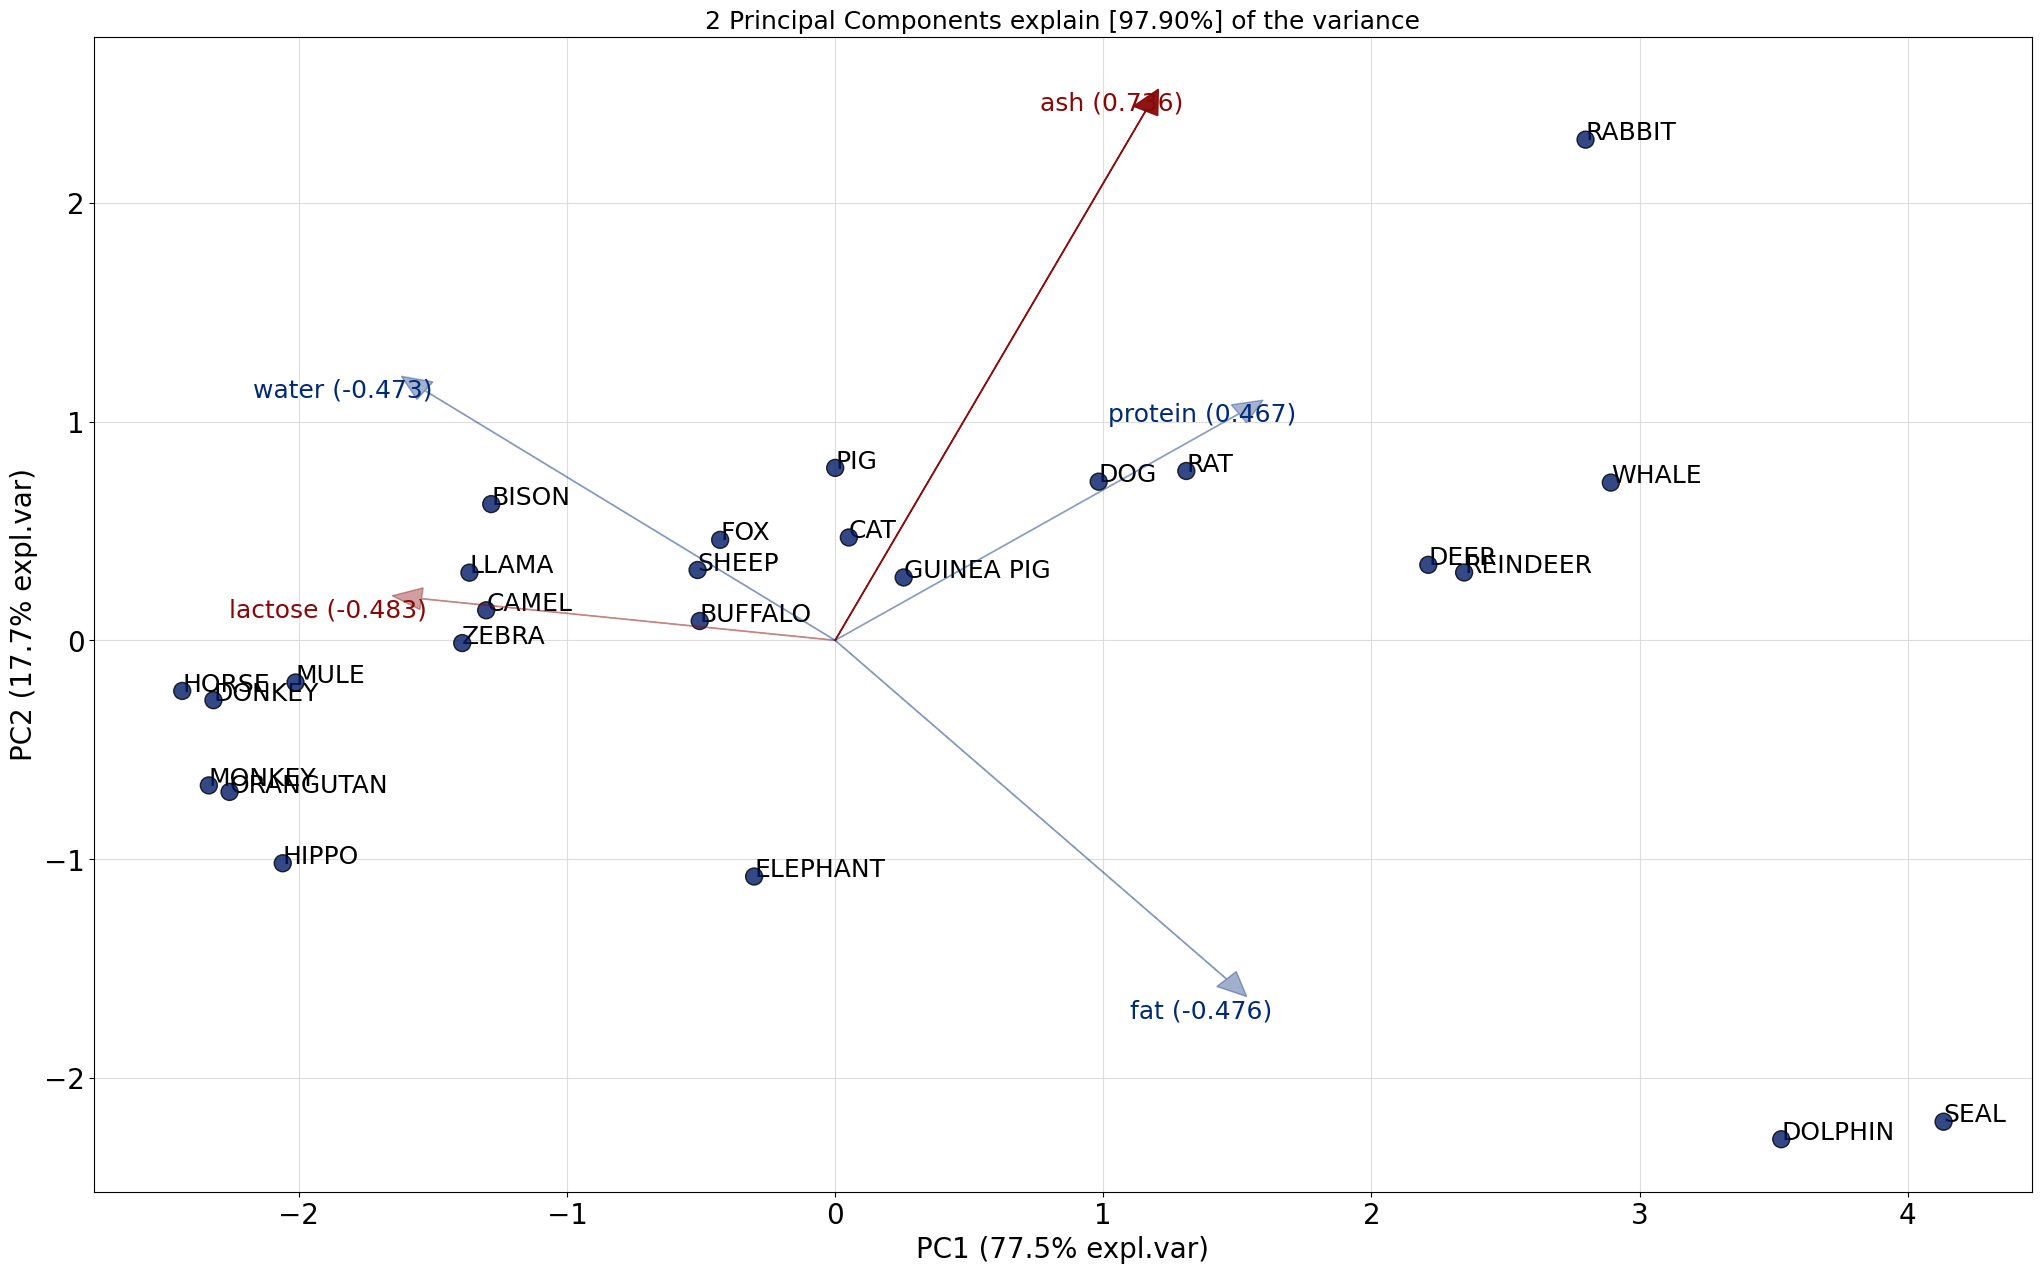

In [84]:
import matplotlib.pyplot as plt
model = pca()
results = model.fit_transform(milk_scl,col_labels= milk.columns, row_labels = list(milk.index))
model.biplot(label= True, legend = True)
for i in np.arange(0,milk.shape[0]):
    plt.text(scores.values[i,0],scores.values[i,1],list(milk.index)[i])
plt.show()

In [88]:
results['model']

PCA(n_components=2)

In [90]:
results

{'loadings':         water   protein       fat   lactose       ash
 PC1 -0.472944  0.466570  0.448683 -0.482891  0.352330
 PC2  0.352855  0.320941 -0.476037  0.059515  0.736435,
 'PC':                  PC1       PC2
 HORSE      -2.435175 -0.231478
 ORANGUTAN  -2.258736 -0.693148
 MONKEY     -2.335861 -0.663328
 DONKEY     -2.318677 -0.273815
 HIPPO      -2.060294 -1.019199
 CAMEL      -1.301536  0.137303
 BISON      -1.282742  0.622667
 BUFFALO    -0.505068  0.088235
 GUINEA PIG  0.255502  0.287373
 CAT         0.051008  0.470136
 FOX        -0.429017  0.459312
 LLAMA      -1.364034  0.309224
 MULE       -2.012658 -0.192807
 PIG         0.000100  0.788138
 ZEBRA      -1.390928 -0.012660
 SHEEP      -0.513120  0.321365
 DOG         0.982829  0.725239
 ELEPHANT   -0.302294 -1.079878
 RABBIT      2.798474  2.288793
 RAT         1.309609  0.774032
 DEER        2.212053  0.345036
 REINDEER    2.345616  0.310003
 WHALE       2.892787  0.721121
 SEAL        4.133773 -2.200801
 DOLPHIN     3.5

In [94]:
results.keys()


dict_keys(['loadings', 'PC', 'explained_var', 'variance_ratio', 'model', 'scaler', 'pcp', 'topfeat', 'outliers', 'outliers_params'])

In [ ]:
lr = LogisticRegression(random_state = 24)
prcomp = PCA(n_components = 5).set_output(transfor)